# Capture model behaviour during training

We can learn a lot about neural networks by observing their performance over time during training by watching the metrics. 
This project shows
- how to inspect history of metrics during training
- plot __accuracy__, __loss__ of __train__, __validation__ data sets

In [1]:
import numpy
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
dataset = numpy.loadtxt('Data/pima-indians-diabetes.csv', delimiter=',')

X = dataset[:, 0:8]
y = dataset[:, 8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
hist = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


NOTE:

- Due to stochastic (random probabilistic) nature, results of the graphs keep varying. 
- Author of the book should have used random seed to keep the results not to vary from what he shows and what we get
- For the sake of understading how to interpret results, I've listed author's results and corresponding interpretations, as well.

Plot __<font color=red>Accuracy</font>__ of __Train__ and __Validate__ data sets visually

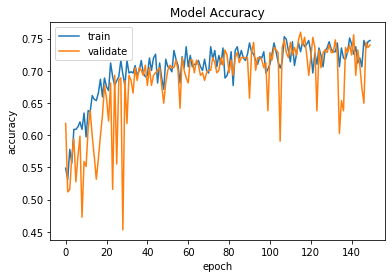

In [4]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

Author's resulting graph and corresponding interpretations:
<img src='Data/pima_accuracy_JasonBrownlee.png' width=400/>
<u>Interpretations</u>:

- model could be trained little more as the trend on both datasets is still rising in last few epochs
- model has not yet over-learned the training set

Plot __<font color=red>Loss</font>__ of __Train__ and __Validate__ data set visually

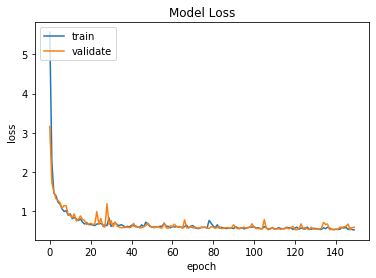

In [5]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

Author's resulting graph and corresponding interpretations:
<img src='Data/pima_loss_JasonBrownlee.png' width=400/>
<u>Interpretations</u>:
- If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch

__NOTE__:
- I guess, I could smoothen the curves to reduce the wavy nature of the training and validation data sets.